# Projeto da Disciplina Análise de Séries Temporais e Regressão

Aluno: Bruno Cardoso Dantas


1.   Link para base de dados: https://github.com/jairpaulino/timeseries_forecasting
2.   Data: AirPassengers.csv

In [1]:
# Importações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVR

from math import sqrt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/UFPE - Ciência de Dados/INTRODUÇÃO À ANÁLISE DE DADOS E ESTATÍSTICA/

!ls

/content/drive/MyDrive/UFPE - Ciência de Dados/INTRODUÇÃO À ANÁLISE DE DADOS E ESTATÍSTICA
AirPassengers.csv  Atividade_de_modelos_lineares-ARIMA.ipynb  Projeto.ipynb


# Dataset


In [5]:
# Aquisição da base de dados
file_path = "./AirPassengers.csv"
AirPassengers = pd.read_csv(file_path, encoding='latin1')
AirPassengers

,time,target
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# 1) Estimação do modelo estatístico linear

*   Faça todo pré-processamento necessário para treinar um modelo ARIMA utilizando a metodologia de Box & Jenkins.
*   Escolha o modelo mais adequado para fazer a previsão no conjunto de teste a partir do erro no conjunto de treinamento e da série de resíduos.
*   Gere os erros de previsão e gráficos para o conjunto de treinamento e teste. Sugestão: erro quadrático médio (EQM, ou MSE em inglês) e mean absolute percentage error (MAPE).


1.1 Pré-processamento para ARIMA:

In [6]:
# Convertendo a coluna 'time' para o formato datetime
AirPassengers['time'] = pd.to_datetime(AirPassengers['time'])

In [7]:
# Ordenando o DataFrame pela coluna 'time'
AirPassengers.sort_values(by='time', inplace=True)

In [8]:
# Definindo a coluna 'time' como índice
AirPassengers.set_index('time', inplace=True)

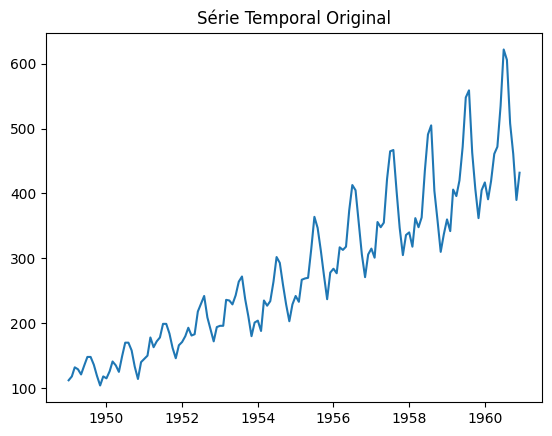

In [9]:
# Visualizando a série temporal
plt.plot(AirPassengers)
plt.title('Série Temporal Original')
plt.show()

In [10]:
# Diferenciação para tornar a série estacionária
diff_series = AirPassengers.diff().dropna()

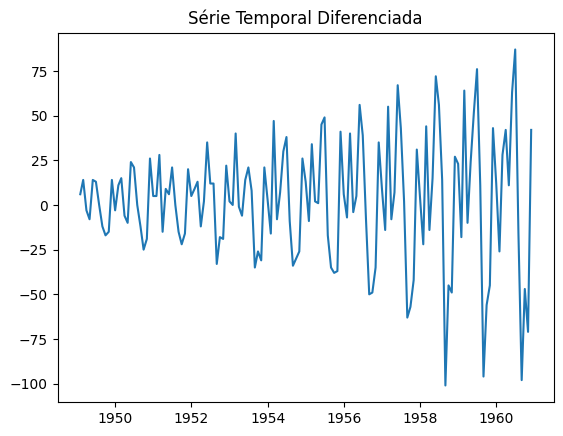

In [11]:
# Visualizando a série diferenciada
plt.plot(diff_series)
plt.title('Série Temporal Diferenciada')
plt.show()

In [12]:
# Dividindo a série diferenciada nos conjuntos de treinamento, validação e teste
total_rows = len(diff_series)
train_size = int(0.5 * total_rows)
val_size = int(0.25 * total_rows)

train_set = diff_series.iloc[:train_size]
val_set = diff_series.iloc[train_size:train_size + val_size]
test_set = diff_series.iloc[train_size + val_size:]

1.2 - Escolha do modelo ARIMA:

In [13]:
# Função para encontrar a ordem p, d, q com menor AIC
def find_best_arima(train_data):
    best_aic = float('inf')
    best_order = None

    for p in range(3):
        for d in range(2):
            for q in range(3):
                try:
                    model = ARIMA(train_data, order=(p, d, q))
                    fit_model = model.fit()
                    aic = fit_model.aic

                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)

                except:
                    continue

    return best_order

In [14]:
# Encontrando a melhor ordem para o conjunto de treinamento
best_order = find_best_arima(train_set)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [15]:
# Treinando o modelo ARIMA com a melhor ordem
model = ARIMA(train_set, order=best_order)
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


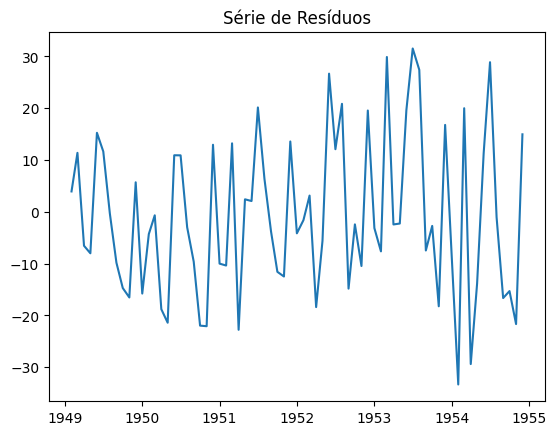

In [16]:
# Visualizando a série de resíduos
residuals = fit_model.resid
plt.plot(residuals)
plt.title('Série de Resíduos')
plt.show()

1.3 Geração de erros e gráficos:

In [17]:
# Fazendo previsões no conjunto de teste
test_predictions = fit_model.forecast(steps=len(test_set))

In [18]:
# Avaliando o desempenho no conjunto de teste
mse_test = mean_squared_error(test_set, test_predictions)
mape_test = mean_absolute_error(test_set, test_predictions) / test_set.mean() * 100

In [19]:
print(f"Erro Quadrático Médio (MSE) no conjunto de teste: {mse_test}")
print(f"Erro Médio Absoluto Percentual (MAPE) no conjunto de teste: {mape_test}%")

Erro Quadrático Médio (MSE) no conjunto de teste: 2523.4999820060248
Erro Médio Absoluto Percentual (MAPE) no conjunto de teste: target    1231.462019
dtype: float64%


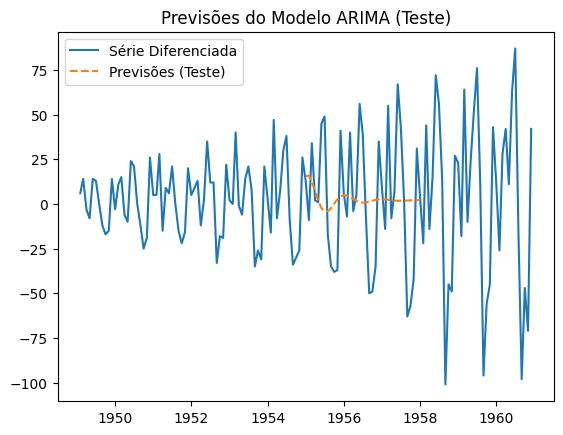

In [20]:
# Visualizando as previsões e os erros no conjunto de teste
plt.plot(diff_series, label='Série Diferenciada')
plt.plot(test_predictions, label='Previsões (Teste)', linestyle='--')
plt.legend()
plt.title('Previsões do Modelo ARIMA (Teste)')
plt.show()

# 2) Treinamento do modelo de Aprendizado de Máquina

*   Faça todo pré-processamento necessário para treinar uma Rede Neural Multilayer Perceptron, ou uma Support Vector Regression.
*   Utilize um grid search/random search para estabelecer os parâmetros do modelo.
*   Utilize o conjunto de validação para selecionar o melhor modelo.
*   Gere os erros de previsão e gráficos para o conjunto de treinamento, validação e teste. Sugestão: erro quadrático médio (EQM, ou MSE em inglês) e mean absolute percentage error (MAPE).

2.1 Pré-processamento para SVR:

In [21]:
# Convertendo a coluna 'time' para o formato datetime
file_path = "./AirPassengers.csv"
AirPassengers_SVR = pd.read_csv(file_path, encoding='latin1')

In [22]:
# Convertendo a coluna 'time' para o formato datetime
AirPassengers_SVR['time'] = pd.to_datetime(AirPassengers_SVR['time'])

In [23]:
# Ordenando o DataFrame pela coluna 'time'
AirPassengers_SVR.sort_values(by='time', inplace=True)

In [24]:
# Definindo a coluna 'time' como índice
AirPassengers_SVR.set_index('time', inplace=True)

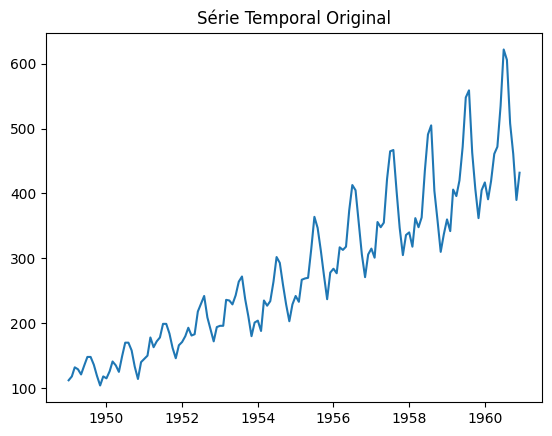

In [25]:
# Visualizando a série temporal
plt.plot(AirPassengers_SVR)
plt.title('Série Temporal Original')
plt.show()

In [26]:
# Dividindo a série nos conjuntos de treinamento, validação e teste
total_rows_SVR = len(AirPassengers_SVR)
train_size_SVR = int(0.5 * total_rows_SVR)
val_size_SVR = int(0.25 * total_rows_SVR)

train_set_SVR = AirPassengers_SVR.iloc[:train_size_SVR]
val_set_SVR = AirPassengers_SVR.iloc[train_size_SVR:train_size_SVR + val_size_SVR]
test_set_SVR = AirPassengers_SVR.iloc[train_size_SVR + val_size_SVR:]

In [27]:
# Feature engineering (pode ser necessário ajustar conforme necessário)
def create_features(data):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['day_of_week'] = data.index.dayofweek
    return data

In [28]:
train_set_SVR = create_features(train_set_SVR)
val_set_SVR = create_features(val_set_SVR)
test_set_SVR = create_features(test_set_SVR)

<ipython-input-27-1f39d3a1ecb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data.index.month
<ipython-input-27-1f39d3a1ecb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data.index.day
<ipython-input-27-1f39d3a1ecb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [29]:
# Separando os preditores (features) e o alvo (target)
X_train_SVR, y_train_SVR = train_set_SVR.drop('target', axis=1), train_set_SVR['target']
X_val_SVR, y_val_SVR = val_set_SVR.drop('target', axis=1), val_set_SVR['target']
X_test_SVR, y_test_SVR = test_set_SVR.drop('target', axis=1), test_set_SVR['target']

In [30]:
# Normalizando os dados
scaler_SVR = StandardScaler()
X_train_scaled_SVR = scaler_SVR.fit_transform(X_train_SVR)
X_val_scaled_SVR = scaler_SVR.transform(X_val_SVR)
X_test_scaled_SVR = scaler_SVR.transform(X_test_SVR)

2.2 Grid Search para SVR:

In [31]:
# Definindo os parâmetros para o grid search
param_grid_SVR = {'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

In [32]:
# Criando o modelo SVR
svr_SVR = SVR()

In [33]:
# Configurando o GridSearchCV com validação cruzada em séries temporais
tscv_SVR = TimeSeriesSplit(n_splits=5)
grid_search_SVR = GridSearchCV(svr_SVR, param_grid_SVR, scoring='neg_mean_squared_error', cv=tscv_SVR, verbose=1)

In [34]:
# Executando o grid search no conjunto de treinamento
grid_search_SVR.fit(X_train_scaled_SVR, y_train_SVR)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=1)

In [35]:
# Obtendo o melhor modelo
best_svr_SVR = grid_search_SVR.best_estimator_

2.3 Seleção do Melhor Modelo com Conjunto de Validação:

In [36]:
# Realizando previsões nos conjuntos de treinamento, validação e teste
train_predictions_SVR = best_svr_SVR.predict(X_train_scaled_SVR)
val_predictions_SVR = best_svr_SVR.predict(X_val_scaled_SVR)
test_predictions_SVR = best_svr_SVR.predict(X_test_scaled_SVR)

2.4 Avaliação e Visualização dos Resultados:

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Avaliando o desempenho nos conjuntos de treinamento, validação e teste
mse_train_SVR = mean_squared_error(y_train_SVR, train_predictions_SVR)
mape_train_SVR = mean_absolute_error(y_train_SVR, train_predictions_SVR) / y_train_SVR.mean() * 100

mse_val_SVR = mean_squared_error(y_val_SVR, val_predictions_SVR)
mape_val_SVR = mean_absolute_error(y_val_SVR, val_predictions_SVR) / y_val_SVR.mean() * 100

mse_test_SVR = mean_squared_error(y_test_SVR, test_predictions_SVR)
mape_test_SVR = mean_absolute_error(y_test_SVR, test_predictions_SVR) / y_test_SVR.mean() * 100


In [38]:
# Imprimindo os resultados
print(f"Erro Quadrático Médio (MSE) no conjunto de treinamento: {mse_train_SVR}")
print(f"Erro Médio Absoluto Percentual (MAPE) no conjunto de treinamento: {mape_train_SVR}%")

print(f"\nErro Quadrático Médio (MSE) no conjunto de validação: {mse_val_SVR}")
print(f"Erro Médio Absoluto Percentual (MAPE) no conjunto de validação: {mape_val_SVR}%")

print(f"\nErro Quadrático Médio (MSE) no conjunto de teste: {mse_test_SVR}")
print(f"Erro Médio Absoluto Percentual (MAPE) no conjunto de teste: {mape_test_SVR}%")

Erro Quadrático Médio (MSE) no conjunto de treinamento: 1910.0602479227173
Erro Médio Absoluto Percentual (MAPE) no conjunto de treinamento: 19.37002768427301%

Erro Quadrático Médio (MSE) no conjunto de validação: 24345.805080606096
Erro Médio Absoluto Percentual (MAPE) no conjunto de validação: 45.122131052092904%

Erro Quadrático Médio (MSE) no conjunto de teste: 65446.20737351106
Erro Médio Absoluto Percentual (MAPE) no conjunto de teste: 57.313901584712056%


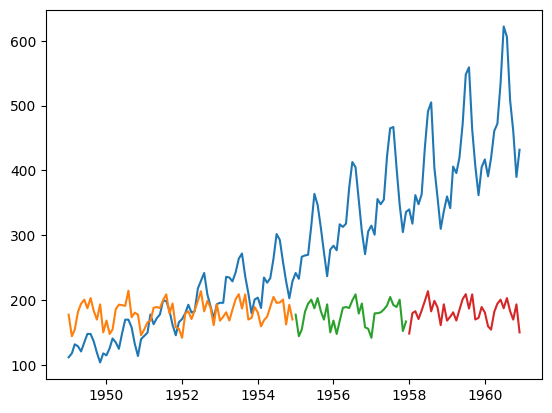

In [39]:
# Visualizando as previsões
plt.plot(AirPassengers_SVR.index, AirPassengers_SVR['target'], label='Observado')
plt.plot(train_set_SVR.index, train_predictions_SVR, label='Treinamento (SVR)')
plt.plot(val_set_SVR.index, val_predictions_SVR, label='Validação (SVR)')
plt.plot(test_set_SVR.index, test_predictions_SVR, label='Teste')

# 3) Treinamento de um sistema híbrido

*   Escolha um sistema híbrido:

  *   Algoritmos de busca + técnicas de AM
  *   Combinação de modelos estatísticos e de AM
  *   Ensembles

*   Utilize o conjunto de validação para selecionar o melhor modelo.
*   Gere os erros de previsão para o conjunto de treinamento, validação e teste. Sugestão: erro quadrático médio (EQM, ou MSE em inglês) e mean absolute percentage error (MAPE).

In [40]:
# Carregando o conjunto de dados
file_path = "./AirPassengers.csv"
AirPassengers_hib = pd.read_csv(file_path, encoding='latin1')

In [41]:
# Convertendo a coluna 'time' para um formato numérico
label_encoder = LabelEncoder()
AirPassengers_hib['time_encoded'] = label_encoder.fit_transform(AirPassengers_hib['time'])

In [42]:
# Separar os dados em treinamento, validação e teste
X = AirPassengers_hib[['time_encoded']]
y = AirPassengers_hib['target']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [44]:
# Função para calcular o mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

3.1 Escolha um sistema híbrido:

In [45]:
# Treinamento do modelo ARIMA
order_arima = (1, 1, 1)  # Substitua pelos parâmetros adequados
arima_model = ARIMA(y_train, order=order_arima)
arima_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
# Treinamento do modelo SVR
svr_model = SVR(kernel='linear', C=1, epsilon=0.1)  # Substitua pelos parâmetros adequados
svr_fit = svr_model.fit(X_train, y_train)

In [47]:
# Ensembles (Combinação dos modelos)
y_train_arima = arima_fit.predict(start=0, end=len(y_train)-1)
y_train_svr = svr_fit.predict(X_train)
y_train_hybrid = (y_train_arima + y_train_svr) / 2

3.2 Utilize o conjunto de validação para selecionar o melhor modelo:

In [48]:
y_val_arima = arima_fit.predict(start=len(y_train), end=len(y_train) + len(y_val) - 1)
y_val_svr = svr_fit.predict(X_val)
y_val_hybrid = (y_val_arima + y_val_svr) / 2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


3.2 Gere os erros de previsão para o conjunto de treinamento, validação e teste:

In [49]:
mse_train = mean_squared_error(y_train, y_train_hybrid)
mape_train = mean_absolute_percentage_error(y_train, y_train_hybrid)

mse_val = mean_squared_error(y_val, y_val_hybrid)
mape_val = mean_absolute_percentage_error(y_val, y_val_hybrid)

In [50]:
# Exibir resultados
print("Desempenho no conjunto de treinamento:")
print("MSE:", mse_train)
print("MAPE:", mape_train)

print("\nDesempenho no conjunto de validação:")
print("MSE:", mse_val)
print("MAPE:", mape_val)

Desempenho no conjunto de treinamento:
MSE: 6589.43105796678
MAPE: 23.159905762979193

Desempenho no conjunto de validação:
MSE: 5909.80179834942
MAPE: 28.51287753580371


# 4) comparação dos três modelos

*   A série utilizada nos experimentos.
*   A metodologia utilizada em cada uma das tarefas.
*   Mostre a comparação dos modelos.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [53]:
# Carregar os dados
file_path = "./AirPassengers.csv"
AirPassengers_hib = pd.read_csv(file_path, encoding='latin1')

In [54]:
# Convertendo a coluna 'time' para um formato numérico
label_encoder = LabelEncoder()
AirPassengers_hib['time_encoded'] = label_encoder.fit_transform(AirPassengers_hib['time'])

In [55]:
# Separar os dados em treinamento, validação e teste
X = AirPassengers_hib[['time_encoded']]
y = AirPassengers_hib['target']

In [56]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [57]:
# Função para calcular o mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
# Treinamento do modelo ARIMA
order_arima = (1, 1, 1)
arima_model = ARIMA(y_train, order=order_arima)
arima_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [59]:
# Treinamento do modelo SVR
svr_model = SVR(kernel='linear', C=1, epsilon=0.1)
svr_fit = svr_model.fit(X_train, y_train)

In [60]:
# Treinamento do modelo híbrido
y_train_arima = arima_fit.predict(start=0, end=len(y_train)-1)
y_train_svr = svr_fit.predict(X_train)
y_train_hybrid = (y_train_arima + y_train_svr) / 2

In [61]:
# Previsões nos conjuntos de validação e teste
y_val_arima = arima_fit.predict(start=len(y_train), end=len(y_train) + len(y_val) - 1)
y_val_svr = svr_fit.predict(X_val)
y_val_hybrid = (y_val_arima + y_val_svr) / 2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [62]:
y_test_arima = arima_fit.predict(start=len(y_train) + len(y_val), end=len(y_train) + len(y_val) + len(y_test) - 1)
y_test_svr = svr_fit.predict(X_test)
y_test_hybrid = (y_test_arima + y_test_svr) / 2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [63]:
# Avaliação do desempenho
mse_val_arima = mean_squared_error(y_val, y_val_arima)
mape_val_arima = mean_absolute_percentage_error(y_val, y_val_arima)

mse_val_svr = mean_squared_error(y_val, y_val_svr)
mape_val_svr = mean_absolute_percentage_error(y_val, y_val_svr)

mse_val_hybrid = mean_squared_error(y_val, y_val_hybrid)
mape_val_hybrid = mean_absolute_percentage_error(y_val, y_val_hybrid)

mse_test_arima = mean_squared_error(y_test, y_test_arima)
mape_test_arima = mean_absolute_percentage_error(y_test, y_test_arima)

mse_test_svr = mean_squared_error(y_test, y_test_svr)
mape_test_svr = mean_absolute_percentage_error(y_test, y_test_svr)

mse_test_hybrid = mean_squared_error(y_test, y_test_hybrid)
mape_test_hybrid = mean_absolute_percentage_error(y_test, y_test_hybrid)

In [64]:
# Visualização dos resultados
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

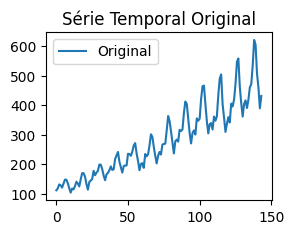

In [65]:
# Série temporal original
plt.subplot(2, 2, 1)
plt.plot(y, label='Original')
plt.title('Série Temporal Original')
plt.legend()

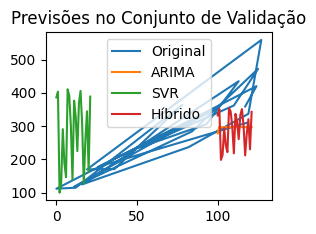

In [66]:
# Previsões no conjunto de validação
plt.subplot(2, 2, 2)
plt.plot(y_val, label='Original')
plt.plot(y_val_arima, label='ARIMA')
plt.plot(y_val_svr, label='SVR')
plt.plot(y_val_hybrid, label='Híbrido')
plt.title('Previsões no Conjunto de Validação')
plt.legend()

Text(0.5, 1.0, 'Previsões no Conjunto')

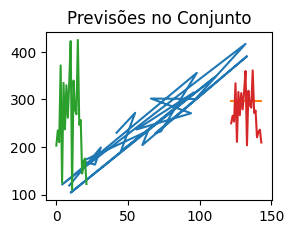

In [67]:
# Previsões no conjunto de teste
plt.subplot(2, 2, 3)
plt.plot(y_test, label='Original')
plt.plot(y_test_arima, label='ARIMA')
plt.plot(y_test_svr, label='SVR')
plt.plot(y_test_hybrid, label='Híbrido')
plt.title('Previsões no Conjunto')